In [113]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 電影名稱:天氣之子
data = []
num = 20
for page in range(1,num+1):
    url = "https://movies.yahoo.com.tw/movieinfo_review.html/id=10091?sort=update_ts&order=desc&page=" + str(page)
    res = requests.get(url)
    soup = BeautifulSoup(res.text,'lxml')
    contents = soup.find_all('div','usercom_inner _c')
    for c in contents:
        comment_text = c.select('span')[2].text
        comment_name = c.find('div','user_id unuser').text.split('發表人：')[-1]
        comment_time = c.find('div','user_time unuser').text.split('發表時間：')[-1]
        df = pd.DataFrame([{'comment_name':comment_name,
                            'comment_text':comment_text,
                            'comment_time':comment_time}])
        data.append(df)
df = pd.concat(data,ignore_index=True)
df.to_csv("yahoo_comment.csv",encoding='utf-8-sig',index=0)

In [139]:
#讀取前10筆資料 
df = pd.read_csv("D:/movie_analysis/yahoo_comment.csv")
df.head(10) 

,comment_name,comment_text,comment_time,label
0,阿陰,【以下負雷】給一星我都嫌太高。\r\n起手式我是從2004年看過《雲的彼端，約定的地方》回頭...,2021/2/1 10:31,負面
1,怡澄,我覺得很不錯，畫風很漂亮，歌很好聽，雖然劇情方面可能沒有描寫的很清楚，人物設定有點少，但是導...,2020/10/14 19:26,正面
2,鳳,莫名其妙的劇情 這難過花時間觀賞,2020/8/22 22:58,負面
3,人大佐 殺,很適合給低智商看的劇情，無意義可悲又無聊,2020/7/26 00:13,負面
4,樹樹道,超級不合常理，超級亂的劇情，不好看,2020/7/13 00:45,負面
5,峻毅,音樂好聽畫風完美但劇情有點太曲折，整個來說算瑕不掩瑜，看電影的時候是非常開心的！！??,2020/5/17 17:27,正面
6,Yuji,依然是高水準的製作，無論是美術、音樂、聲優表現，但由於整體節奏與你的名字雷同，幾個下音樂的時...,2020/4/20 12:07,負面
7,暖暖,"我是看二輪片的,這是我看過電影結局最爛的,莫名其妙的劇情,一直鬼叫女主角名字的男主角,無止盡...",2020/2/14 15:41,負面
8,Anita小公主,畫面依然很美，音樂搭配的很好，看到你的名字的梗時，想起當時的感動，非常好看。,2019/12/8 21:45,正面
9,飛翔,超好看，原本以為應該就是卡通，很多時候，我們以為的犧牲，其實沒有那個必要，歌也很好聽,2019/12/8 05:18,正面


Building prefix dict from D:\movie_analysis\dict_taiwan.txt ...
Loading model from cache C:\Users\csr\AppData\Local\Temp\jieba.u6cc774a4cac07e8e8a28a1356ed17e20.cache
Loading model cost 1.765 seconds.
Prefix dict has been built successfully.


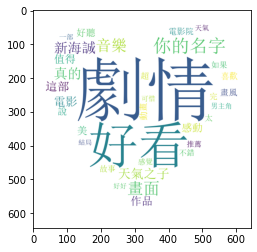

<Figure size 1440x720 with 0 Axes>

In [140]:
import numpy
from PIL import Image
from collections import Counter
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import jieba
#set dictionary
jieba.set_dictionary("D:/movie_analysis/dict_taiwan.txt")

#stop word
stop = []
with open('D:/movie_analysis/stop_word.txt','r',encoding='utf-8') as f:
    for line in f:
        s_t = line.replace('\n','')
        stop.append(s_t)
join_comment = []
for comment_text in df['comment_text']:
    comment = jieba.cut(comment_text,cut_all=False)
    for c in comment:
        #過濾停用字詞
        if c in stop:
            continue
        elif c==None:
            continue
        else:
            join_comment.append(c.replace('\n','').replace('\r','').strip())


diction = Counter(join_comment) #詞頻統計
mask = np.array(Image.open('D:/movie_analysis/heart.jpg')) #設定文字雲形狀
unioncloud = WordCloud(background_color="white",mask=mask,font_path="C:/Windows/Fonts/SimSun.ttc",width=1000,height=600,min_font_size=20)
unioncloud.generate_from_frequencies(frequencies=diction) 
plt.imshow(unioncloud)
plt.figure(figsize=(20,10))
plt.show()

In [141]:
import pandas as pd
#留言情緒分析
#從200則留言來看，正面評論比負面的還要多
df = pd.read_csv('D:/movie_analysis/yahoo_comment.csv')
df.groupby('label')['label'].count()

label
正面    162
負面     38
Name: label, dtype: int64

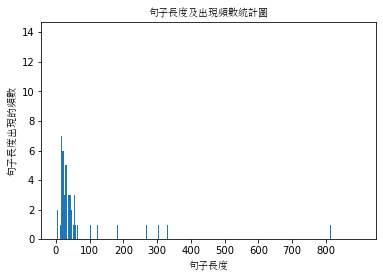

In [142]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from itertools import accumulate
#句子長度
df['length'] = df['comment_text'].apply(lambda x: len(x))
len_df = df.groupby('length').count()
sent_length = len_df.index.tolist()
sent_freq = len_df['comment_text'].tolist()

# 設定matplotlib繪圖時的字型
my_font = font_manager.FontProperties(fname="C:/Windows/Fonts/SimSun.ttc")

# 繪製句子長度及出現頻數統計圖
plt.bar(sent_length, sent_freq)
plt.title("句子長度及出現頻數統計圖", fontproperties=my_font)
plt.xticks(range(0,850,100))
plt.xlabel("句子長度", fontproperties=my_font)
plt.ylabel("句子長度出現的頻數", fontproperties=my_font)
plt.savefig("./句子長度及出現頻數統計圖.png")
plt.show()




分位點為0.91的句子長度:161.


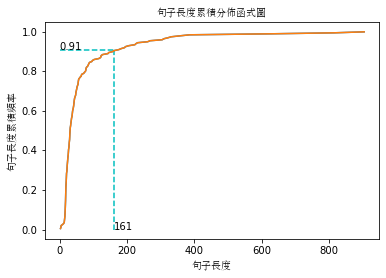

In [143]:
# 繪製句子長度累積分佈函式(CDF)
sent_pentage_list = [(count/sum(sent_freq)) for count in accumulate(sent_freq)]

# 繪製CDF
plt.plot(sent_length, sent_pentage_list)

# 尋找分位點為quantile的句子長度
quantile = 0.91
#print(list(sent_pentage_list))
for length, per in zip(sent_length, sent_pentage_list):
    if round(per, 2) == quantile:
        index = length
        break
print("\n分位點為%s的句子長度:%d." % (quantile, index))

# 繪製句子長度累積分佈函式圖
plt.plot(sent_length, sent_pentage_list)
plt.hlines(quantile, 0, index, colors="c", linestyles="dashed")
plt.vlines(index, 0, quantile, colors="c", linestyles="dashed")
plt.text(0, quantile, str(quantile))
plt.text(index, 0, str(index))
plt.title("句子長度累積分佈函式圖", fontproperties=my_font)
plt.xlabel("句子長度", fontproperties=my_font)
plt.ylabel("句子長度累積頻率", fontproperties=my_font)
plt.savefig("./句子長度累積分佈函式圖.png")
plt.show()

In [154]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dense, Embedding, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import numpy as np

# 匯入資料
# 檔案的資料中，特徵為comment_text, 類別為label.
def load_data(filepath, input_shape=20):
    df = pd.read_csv(filepath).replace('\n','', regex=True).replace('\r','', regex=True)

    # 標籤及詞彙表
    labels, vocabulary = list(df['label'].unique()), list(df['comment_text'].unique())

    # 構造字元級別的特徵
    string = ''
    for word in vocabulary:
        string += word

    vocabulary = set(string)

    # 字典列表
    word_dictionary = {word: i+1 for i, word in enumerate(vocabulary)}
    with open('word_dict.pk', 'wb') as f:
        pickle.dump(word_dictionary, f)
    inverse_word_dictionary = {i+1: word for i, word in enumerate(vocabulary)}
    label_dictionary = {label: i for i, label in enumerate(labels)}
    with open('label_dict.pk', 'wb') as f:
        pickle.dump(label_dictionary, f)
    output_dictionary = {i: labels for i, labels in enumerate(labels)}

    vocab_size = len(word_dictionary.keys()) # 詞彙表大小
    label_size = len(label_dictionary.keys()) # 標籤類別數量

    # 序列填充，按input_shape填充，長度不足的按0補充
    x = [[word_dictionary[word] for word in sent] for sent in df['comment_text']]
    x = pad_sequences(maxlen=input_shape, sequences=x, padding='post', value=0)
    y = [[label_dictionary[sent]] for sent in df['label']]
    y = [np_utils.to_categorical(label, num_classes=label_size) for label in y]
    y = np.array([list(_[0]) for _ in y])

    return x, y, output_dictionary, vocab_size, label_size, inverse_word_dictionary

# 建立深度學習模型， Embedding + LSTM + Softmax.
def create_LSTM(n_units, input_shape, output_dim, filepath):
    x, y, output_dictionary, vocab_size, label_size, inverse_word_dictionary = load_data(filepath)
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size + 1, output_dim=output_dim,
                        input_length=input_shape, mask_zero=True))
    model.add(LSTM(n_units, input_shape=(x.shape[0], x.shape[1])))
    model.add(Dropout(0.2))
    model.add(Dense(label_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    plot_model(model, to_file='./model_lstm.png', show_shapes=True)
    model.summary()

    return model

# 模型訓練
def model_train(input_shape, filepath, model_save_path):

    # 將資料集分為訓練集和測試集，佔比為8:2
    x, y, output_dictionary, vocab_size, label_size, inverse_word_dictionary = load_data(filepath, input_shape)
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0)

    # 模型輸入引數，需要自己根據需要調整
    n_units = 100
    batch_size = 100
    epochs = 14
    output_dim = 20

    # 模型訓練
    lstm_model = create_LSTM(n_units, input_shape, output_dim, filepath)
    lstm_model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=1)

    # 模型儲存
    lstm_model.save(model_save_path)

    N = test_x.shape[0]  # 測試的條數
    predict = []
    label = []
    for start, end in zip(range(0, N, 1), range(1, N+1, 1)):
        sentence = [inverse_word_dictionary[i] for i in test_x[start] if i != 0]
        y_predict = lstm_model.predict(test_x[start:end])
        label_predict = output_dictionary[np.argmax(y_predict[0])]
        label_true = output_dictionary[np.argmax(test_y[start:end])]
        join_sentence = ''.join(sentence)
        predict_df = pd.DataFrame([{'sentence':join_sentence,'label_true':label_true,'label_predict':label_predict}])
        print(predict_df)
        predict.append(label_predict)
        label.append(label_true)

    acc = accuracy_score(predict, label) # 預測準確率
    print('模型在測試集上的準確率為: %s.' % acc)

if __name__ == '__main__':
    filepath = 'D:/movie_analysis/yahoo_comment.csv'
    input_shape = 180
    model_save_path = './corpus_model.h5'
    model_train(input_shape, filepath, model_save_path)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 180, 20)           25020     
_________________________________________________________________
lstm_43 (LSTM)               (None, 100)               48400     
_________________________________________________________________
dropout_43 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 202       
Total params: 73,622
Trainable params: 73,622
Non-trainable params: 0
_________________________________________________________________
Epoch 1/14
2/2 [==============================] - 3s 317ms/step - loss: 0.691

In [130]:
# Import the necessary modules
import pickle
import numpy as np
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences


# 匯入字典
with open('word_dict.pk', 'rb') as f:
    word_dictionary = pickle.load(f)
with open('label_dict.pk', 'rb') as f:
    output_dictionary = pickle.load(f)

try:
    # 資料預處理
    input_shape = 170
    sent = """美得不可思議在至美之下,一切都相形見拙."""
    x = [[word_dictionary[word] for word in sent]]
    x = pad_sequences(maxlen=input_shape, sequences=x, padding='post', value=0)

    # 載入模型
    model_save_path = './corpus_model.h5'
    lstm_model = load_model(model_save_path)

    # 模型預測
    y_predict = lstm_model.predict(x)
    label_dict = {v:k for k,v in output_dictionary.items()}
    print('輸入語句: %s' % sent)
    print('情感預測結果: %s' % label_dict[np.argmax(y_predict)])

except KeyError as err:
    print("您輸入的句子有漢字不在詞彙表中，請重新輸入！")
    print("不在詞彙表中的單詞為：%s." % err)

輸入語句: 美得不可思議在至美之下,一切都相形見拙.
情感預測結果: 正面
